## Collecting data

In [1]:
import pandas as pd 
import seaborn as sns

In [2]:
dataset = pd.read_csv('SUV_data.csv')

## Analysing data

In [3]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


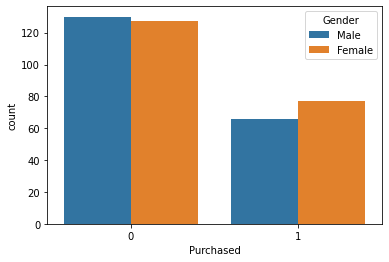

In [4]:
sns.countplot(data=dataset, x='Purchased', hue='Gender')

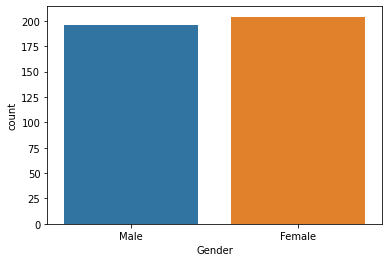

In [5]:
sns.countplot(data=dataset, x='Gender')

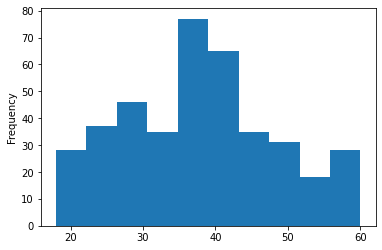

In [6]:
dataset['Age'].plot.hist()

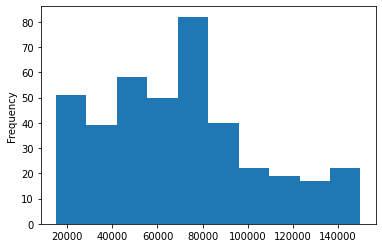

In [7]:
dataset['EstimatedSalary'].plot.hist()

## Data wrangling

In [8]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [9]:
dataset.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [10]:
Gender = pd.get_dummies(dataset['Gender'], drop_first=True)
Gender.head()

,Male
0,1
1,1
2,0
3,0
4,1


In [11]:
dataset = pd.concat([dataset, Gender], axis=1)
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased,Male
0,15624510,Male,19,19000,0,1
1,15810944,Male,35,20000,0,1
2,15668575,Female,26,43000,0,0
3,15603246,Female,27,57000,0,0
4,15804002,Male,19,76000,0,1


## Test train 

In [12]:
x = dataset.iloc[:, [2, 3, 5]].values
y = dataset.iloc[:, 4].values

In [13]:
x

array([[   19, 19000,     1],
       [   35, 20000,     1],
       [   26, 43000,     0],
       ...,
       [   50, 20000,     0],
       [   36, 33000,     1],
       [   49, 36000,     0]])

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [16]:
x_train

array([[    44,  39000,      0],
       [    32, 120000,      1],
       [    38,  50000,      0],
       [    32, 135000,      0],
       [    52,  21000,      0],
       [    53, 104000,      0],
       [    39,  42000,      1],
       [    38,  61000,      1],
       [    36,  50000,      0],
       [    36,  63000,      0],
       [    35,  25000,      0],
       [    35,  50000,      1],
       [    42,  73000,      1],
       [    47,  49000,      0],
       [    59,  29000,      0],
       [    49,  65000,      1],
       [    45, 131000,      0],
       [    31,  89000,      0],
       [    46,  82000,      0],
       [    47,  51000,      0],
       [    26,  15000,      1],
       [    60, 102000,      1],
       [    38, 112000,      0],
       [    40, 107000,      1],
       [    42,  53000,      0],
       [    35,  59000,      1],
       [    48,  41000,      1],
       [    48, 134000,      0],
       [    38, 113000,      0],
       [    29, 148000,      1],
       [  

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
sc = StandardScaler()

In [19]:
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [20]:
x_train

array([[ 0.58164944, -0.88670699, -0.98019606],
       [-0.60673761,  1.46173768,  1.02020406],
       [-0.01254409, -0.5677824 , -0.98019606],
       [-0.60673761,  1.89663484, -0.98019606],
       [ 1.37390747, -1.40858358, -0.98019606],
       [ 1.47293972,  0.99784738, -0.98019606],
       [ 0.08648817, -0.79972756,  1.02020406],
       [-0.01254409, -0.24885782,  1.02020406],
       [-0.21060859, -0.5677824 , -0.98019606],
       [-0.21060859, -0.19087153, -0.98019606],
       [-0.30964085, -1.29261101, -0.98019606],
       [-0.30964085, -0.5677824 ,  1.02020406],
       [ 0.38358493,  0.09905991,  1.02020406],
       [ 0.8787462 , -0.59677555, -0.98019606],
       [ 2.06713324, -1.17663843, -0.98019606],
       [ 1.07681071, -0.13288524,  1.02020406],
       [ 0.68068169,  1.78066227, -0.98019606],
       [-0.70576986,  0.56295021, -0.98019606],
       [ 0.77971394,  0.35999821, -0.98019606],
       [ 0.8787462 , -0.53878926, -0.98019606],
       [-1.20093113, -1.58254245,  1.020

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
reg = LogisticRegression()

In [23]:
reg.fit(x_train, y_train)

LogisticRegression()

## Check accuracy 

In [24]:
predictions = reg.predict(x_test)

In [25]:
from sklearn.metrics import accuracy_score

In [26]:
accuracy_score(y_test, predictions)

0.9

In [27]:
from sklearn.metrics import confusion_matrix

In [28]:
confusion_matrix(y_test, predictions)

array([[65,  3],
       [ 7, 25]])

In [29]:
(65+25)/(65+25+7+3)

0.9